In [32]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io 
import requests
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [37]:

#ds_ = pd.read_csv('F4NP17.csv', sep=';', na_values="?", decimal=',')# se carga el cojunto de datos csv
ds_ = pd.read_csv('F4P17.csv', sep=';', na_values="?", decimal=',')# se carga el cojunto de datos csv

#ds_ = pd.read_csv('F4NP17.csv', sep=';', na_values="?", decimal=',')
ds = ds_.dropna() # se elimina las filas/columnas con valores null
# Convertir datos categoricos a numericos
ds = ds.rename(columns = {ds.columns.values[21]:'C'}) # renombramos la ultima columna por "C" de clase
#le = preprocessing.LabelEncoder() # Label encoder de sci-kit

# Convertir datos categoricos a numericos
tipos = ds.columns[0:21].to_series().groupby(ds.dtypes).groups
ctext = tipos[np.dtype('object')]

for c in ctext:
     ds[c], _ = pd.factorize(ds[c])  



##for c in ctext:
  ##   VAL[c], _ = pd.factorize(VAL[c])  

del ds['COVP']
del ds['EDUM']
del ds['LAPTOP']


ds.head()


,TVE,COVM,EDUP,MTRAB,PTRAB,#PCONV,PHERMANO,TPOBLACION,TDC,#HEEC,ET,INTERNET,DEPOR,RSENTI,P1-16,P2-16,P3-16,P4-16,C
0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,2.9,3.4,3.4,3.6,A
1,1,1,1,1,0,3,3,0,1,1,0,1,1,0,2.6,2.4,2.8,3.9,A
2,1,1,0,0,0,5,3,0,1,2,0,1,0,1,3.1,3.4,3.5,3.9,A
3,0,1,2,0,0,4,1,0,1,1,0,1,0,1,3.0,3.1,3.5,3.7,A
4,0,1,1,1,0,2,4,0,1,0,0,0,0,1,2.7,2.9,2.1,3.1,BS


In [34]:
from sklearn.utils import resample
# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C == "BS"]
ds_minority1 = ds[ds.C == "B"]
ds_minority2 = ds[ds.C == "A"] 
# sobre muestrear las clases minoritarias
ds_minority_upsampled1 = resample(ds_minority1, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=89,    # cantidad de muestras a igualar 
                                 random_state=123) 

ds_minority_upsampled2 = resample(ds_minority2, 
                                 replace=True,     # Muestreo con remplazo
                                 n_samples=89,    # cantidad de muestras a igualar
                                 random_state=123) 
#ds_minority_upsampled3 = resample(ds_minority3, 
 #                                replace=True,     # Muestreo con remplazo
   #                              n_samples=2713,    # cantidad de muestras a igualar
  #                               random_state=123) 

# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_upsampled = pd.concat([ds_majority, ds_minority_upsampled1,ds_minority_upsampled2])
 
# imprimir el numero de muestras por clase
ds1=ds_upsampled
ds_upsampled.C.value_counts()


B     89
BS    89
A     89
Name: C, dtype: int64

In [36]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn.model_selection import train_test_split
x=ds1.drop('C', axis = 1)
y=ds1['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
print('Total del conjunto de datos 267  {}'.format(Counter(y)))
print('-----------------------------------------------------------------------')
print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))



Total del conjunto de datos 267  Counter({'BS': 89, 'B': 89, 'A': 89})
-----------------------------------------------------------------------
Conteo de clases conjunto train Counter({'A': 63, 'B': 62, 'BS': 61})
Conteo de Clases conjunto test  Counter({'BS': 28, 'B': 27, 'A': 26})


In [38]:
from sklearn.utils import resample 

# separar las clases entre mayoritaria y minoritaria 
ds_majority = ds[ds.C == "BS"]
ds_minorityd1 = ds[ds.C == "B"]
ds_minorityd2 = ds[ds.C == "A"] 
#ds_minorityd3 = ds[ds.C == 3]
# sobre muestrear las clases minoritarias
ds_majority_downsampled = resample(ds_majority, 
                                   replace=False,     # Muestreo sin remplaso
                                   n_samples=59,    # cantidad de muestra a igualar
                                   random_state=123) 

ds_majority_downsampled1 = resample(ds_minorityd1, 
                                 replace=False,     # Muestreo sin remplaso
                                 n_samples=59,    # cantidad de muestra a igualar
                                 random_state=123) 



# concaternar la clase mayoritaria con la clases minoritarias creadas recientemente
ds_downsampled = pd.concat([ds_majority_downsampled,ds_majority_downsampled1, ds_minorityd2 ])
 


# imprimir el numero de muestras por clase

ds1=ds_downsampled
ds_downsampled.C.value_counts()

B     59
BS    59
A     59
Name: C, dtype: int64

In [41]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn.model_selection import train_test_split
x=ds1.drop('C', axis = 1)
y=ds1['C']
from collections import Counter
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
#df=pd.DataFrame(x_train)
#df['C']=y_train
#dt=pd.DataFrame(x_test)
#dt['C']=y_test
print('Total del conjunto de datos 177  {}'.format(Counter(y)))
print('-----------------------------------------------------------------------')
print('Conteo de clases conjunto train {}'.format(Counter(y_train)))
print('Conteo de Clases conjunto test  {}'.format(Counter(y_test)))


Total del conjunto de datos 177  Counter({'BS': 59, 'B': 59, 'A': 59})
-----------------------------------------------------------------------
Conteo de clases conjunto train Counter({'A': 48, 'B': 39, 'BS': 36})
Conteo de Clases conjunto test  Counter({'BS': 23, 'B': 20, 'A': 11})


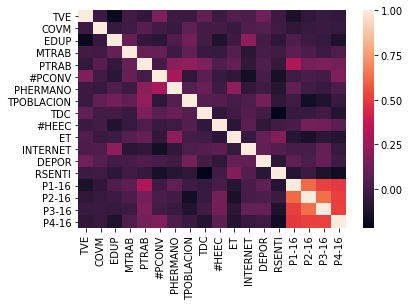

In [5]:
import seaborn as sns 
corr = x_train.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [84]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1,20)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn,x_train,y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.46125, 0.46749999999999997, 0.4354166666666667, 0.46916666666666673, 0.43666666666666665, 0.4291666666666667, 0.41125, 0.41708333333333336, 0.43624999999999997, 0.41624999999999995, 0.4033333333333333, 0.44958333333333333, 0.4033333333333333, 0.39666666666666667, 0.42833333333333334, 0.4091666666666667, 0.40375000000000005, 0.4225, 0.4354166666666667]


In [85]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 19
Max of list 0.46916666666666673


Text(0,0.5,'Cross-validated accuracy')

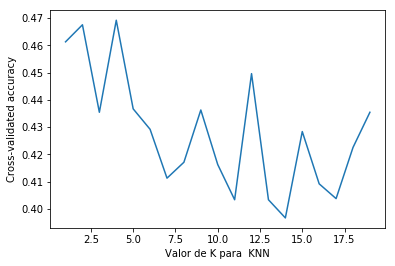

In [86]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para  KNN')
plt.ylabel('Cross-validated accuracy')

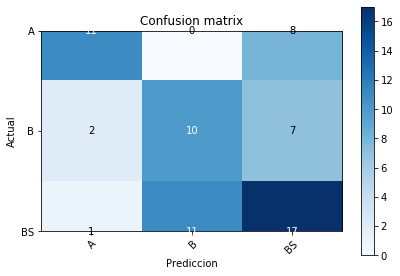


############## Accuracy KNN  K=8 ####################################
0.5671641791044776

############## Metricas KNN  K=8 #####################################
              precision    recall  f1-score   support

           A       0.79      0.58      0.67        19
           B       0.48      0.53      0.50        19
          BS       0.53      0.59      0.56        29

    accuracy                           0.57        67
   macro avg       0.60      0.56      0.57        67
weighted avg       0.59      0.57      0.57        67



In [6]:
n_neighbors =8
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)

######################################################################


class_names= ds['C']
def plot_confusion_matrix(y_test, KNN_predict, classes,
                          normalize=False,
                          title=True,
                          cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_test, KNN_predict)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, KNN_predict)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['A', 'B','BS'], yticklabels=['A', 'B','BS'],
           title=title,
           ylabel='Actual',
           xlabel='Prediccion')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
             ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, KNN_predict, classes = class_names, 
                      title='Confusion matrix')      
plt.show()
#########################################################################


print("\n############## Accuracy KNN  K=8 ####################################")
print(metrics.accuracy_score(y_test, KNN_predict))
print("\n############## Metricas KNN  K=8 #####################################")
print(classification_report(y_test,KNN_predict))

In [88]:
# search for an optimal value of C for SVM

# range of k we want to try
G_range = range(1, 20)
# empty list to store scores
G_scores = []

# 1. we will loop through reasonable values of k
for G in G_range:
    # 2. run KNeighborsClassifier with k neighbours
    SVM = svm.SVC(kernel='linear',C=G, gamma=1)
    
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(SVM,x_train,y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    G_scores.append(scores.mean())


print(G_scores)

[0.8636559139784946, 0.8701075268817204, 0.8440860215053764, 0.8311827956989248, 0.824731182795699, 0.8378494623655914, 0.8249462365591398, 0.8249462365591398, 0.8443010752688173, 0.8440860215053764, 0.8440860215053764, 0.8376344086021505, 0.8311827956989248, 0.8376344086021505, 0.8440860215053764, 0.8376344086021505, 0.8440860215053764, 0.8505376344086022, 0.856989247311828]


In [89]:
print('Length of list', len(G_scores))
print('Max of list', max(G_scores))

Length of list 19
Max of list 0.8701075268817204


Text(0,0.5,'Accuracy-Validacion Cruzada')

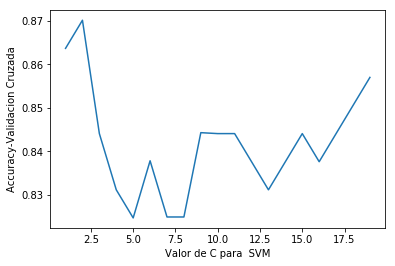

In [90]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(G_range, G_scores)
plt.xlabel('Valor de C para  SVM')
plt.ylabel('Accuracy-Validacion Cruzada')

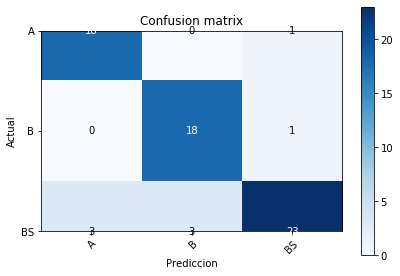


############## Accuracy SVM Lineal C=8, gamma=1 ##################
0.8805970149253731

############## Metricas SVM Lineal C=8, gamma=1 ##################
              precision    recall  f1-score   support

           A       0.86      0.95      0.90        19
           B       0.86      0.95      0.90        19
          BS       0.92      0.79      0.85        29

    accuracy                           0.88        67
   macro avg       0.88      0.90      0.88        67
weighted avg       0.88      0.88      0.88        67



In [7]:
########################################################################

SVM = svm.SVC(kernel='linear',C=8, gamma=1)
SVM.fit(x_train, y_train)
#print(SVMrbf.predict(VAL))
SVM_predict = SVM.predict(x_test)



######################################################################
def plot_confusion_matrix(y_test,SVM_predict, classes,
                          normalize=False,
                          title=True,
                          cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_test, SVM_predict)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, SVM_predict)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['A', 'B','BS'], yticklabels=['A', 'B','BS'],
           title=title,
           ylabel='Actual',
           xlabel='Prediccion')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
             ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names= ds['C']
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, SVM_predict, classes = class_names, 
                      title='Confusion matrix')      
plt.show()
#########################################################################


print("\n############## Accuracy SVM Lineal C=8, gamma=1 ##################")
print(metrics.accuracy_score(y_test, SVM_predict))
#print("\n############## Confusion SVM Lineal C=8, gamma=1 ################")
#print(metrics.confusion_matrix(y_test, SVM_predict))
print("\n############## Metricas SVM Lineal C=8, gamma=1 ##################")
print(classification_report(y_test,SVM_predict))




In [42]:
# search for an optimal value of C for SVM
from sklearn.neural_network import MLPClassifier
#h_range=np.array([16,32,64,128])
# range of k we want to try
h_range = range(13)

# empty list to store scores
h_scores = []

# 1. we will loop through reasonable values of k
for h in h_range:
    # 2. run KNeighborsClassifier with k neighbours
    clf = MLPClassifier(hidden_layer_sizes=(h,h,h,h,h,h,h,h,h,h) ,activation='relu',random_state=1, learning_rate_init=0.0016)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(clf,x_train,y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    h_scores.append(scores.mean())
    h=h+7

print(h)
print(h_scores)

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: hidden_layer_sizes must be > 0, got [0, 0, 0, 0, 0, 0, 0, 0, 0, 0].

In [35]:
print('Length of list', len(h_scores))
print('Max of list', max(h_scores))

Length of list 22
Max of list 0.721523915461624


Text(0,0.5,'Accuracy-Validacion Cruzada')

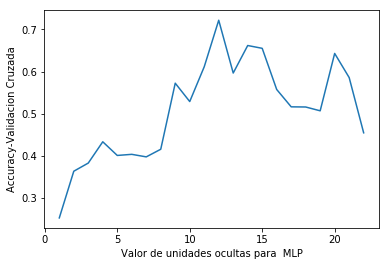

In [36]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(h_range, h_scores)
plt.xlabel('Valor de unidades ocultas para  MLP')
plt.ylabel('Accuracy-Validacion Cruzada')

C:\Users\Andres\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


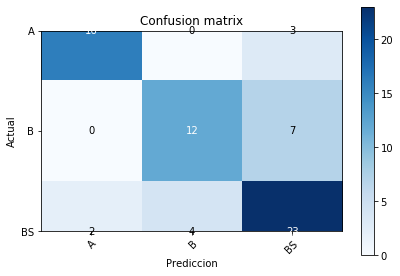


### Accuracy MLP capas ocultas 10 ,unidades ocultas 13 ######################
0.7611940298507462

### Metricas MLP capas ocultas 10 ,unidades ocultas 13 #######################
              precision    recall  f1-score   support

           A       0.89      0.84      0.86        19
           B       0.75      0.63      0.69        19
          BS       0.70      0.79      0.74        29

    accuracy                           0.76        67
   macro avg       0.78      0.76      0.76        67
weighted avg       0.77      0.76      0.76        67



In [8]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12,12,12,12,12) ,activation='relu',
                    random_state=1, learning_rate_init=0.0016)

clf.fit(x_train, y_train)

clf_predict = clf.predict(x_test)


######################################################################
def plot_confusion_matrix(y_test,SVM_predict, classes,
                          normalize=False,
                          title=True,
                          cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_test, clf_predict)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, clf_predict)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=['A', 'B','BS'], yticklabels=['A', 'B','BS'],
           title=title,
           ylabel='Actual',
           xlabel='Prediccion')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
             ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names= ds['C']
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf_predict, classes = class_names, 
                      title='Confusion matrix')      
plt.show()
#########################################################################


print("\n### Accuracy MLP capas ocultas 10 ,unidades ocultas 13 ######################")
print(metrics.accuracy_score(y_test, clf_predict))
print("\n### Metricas MLP capas ocultas 10 ,unidades ocultas 13 #######################")
print(classification_report(y_test, clf_predict))


In [214]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import io 
import requests
from sklearn.metrics import classification_report, confusion_matrix

#ds_ = pd.read_csv('F8N4P.csv', sep=';', na_values="?", decimal=',')# se carga el cojunto de datos csv
ds_ = pd.read_csv('F4NP17.csv', sep=';', na_values="?", decimal=',')# se carga el cojunto de datos csv

#ds_ = pd.read_csv('F4NP17.csv', sep=';', na_values="?", decimal=',')
ds = ds_.dropna() # se elimina las filas/columnas con valores null
# Convertir datos categoricos a numericos
ds = ds.rename(columns = {ds.columns.values[21]:'C'}) # renombramos la ultima columna por "C" de clase
#le = preprocessing.LabelEncoder() # Label encoder de sci-kit

# Convertir datos categoricos a numericos
tipos = ds.columns[0:22].to_series().groupby(ds.dtypes).groups
ctext = tipos[np.dtype('object')]

for c in ctext:
     ds[c], _ = pd.factorize(ds[c])  



##for c in ctext:
  ##   VAL[c], _ = pd.factorize(VAL[c])  
x=ds.drop('C', axis = 1)
y=ds['C']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


((176, 21), (44, 21), (176,), (44,))

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


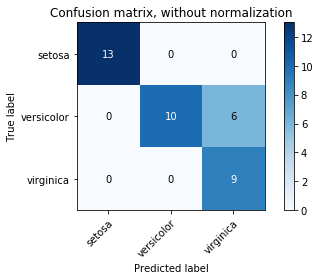

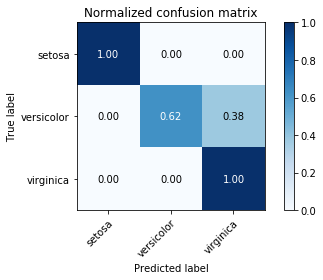

In [43]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [224]:
 knn = KNeighborsClassifier(n_neighbors=13)
# create a Python list of three feature names
#['TVE','COVM','COVP','EDUM','EDUP','MTRAB','PTRAB','#PCONV','PHERMANO','TPOBLACION','TDC','#HEEC','ET','LAPTOP','INTERNET','DEPOR','RSENTI','P1-16','P2-16','P3-16','P4-16']

feature_cols = ['TVE','COVM','EDUP','TDC','#HEEC','ET','DEPOR','RSENTI','P1-16','P2-16','P3-16','P4-16']

feature_cols1 = ['TVE','COVM','EDUP','TDC','#HEEC','ET','DEPOR','RSENTI','P1-16','P2-16','P3-16','P4-16']
# use the list to select a subset of the DataFrame (X)
X = x_train[feature_cols]
x_test=x_test[feature_cols1]
#t = y_train[feature_cols1]
# select the Sales column as the response (y)
# since we're selecting only one column, we can select the attribute using .attribute


In [225]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with all three features
knn = KNeighborsClassifier(n_neighbors=4)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
#scores = cross_val_score(knn,predictors,target, cv=10, scoring='accuracy')
# instantiate model
#lm = LinearRegression()

# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
#cross_val_score(knn,predictors,target, cv=10, scoring='accuracy')
scores = cross_val_score(knn,X,y_train, cv=5, scoring='accuracy')
print(scores)

[0.47222222 0.47222222 0.44444444 0.34285714 0.39393939]


In [21]:
################################################################
##################  K-Vecinos más cercanos #####################
################################################################
xntrain =X
yntrain =y_train
xntest =x_test
yntest = y_test

n_neighbors = 13
KNN = KNeighborsClassifier(n_neighbors)
KNN.fit(xntrain, yntrain)
KNN_predict = KNN.predict(xntest)

print("\n############## Accuracy KNN  K=4 ####################################")
print(metrics.accuracy_score(yntest, KNN_predict))
print("\n############## Confusion KNN  K=4 #####################################")
print(metrics.confusion_matrix(yntest, KNN_predict))
print("\n############## Metricas KNN  K=4 #####################################")
print(classification_report(yntest,KNN_predict))

NameError: name 'X' is not defined